# Inspired by [Matt Harrison](https://twitter.com/__mharrison__/status/1560656737379782657), from the raw source data, recreate the following plot as seen in Len Kiefer's [tweet](https://twitter.com/lenkiefer/status/1549118215795744768):
<img src="hmi_chart.png" width="500"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates
# import matplotlib.colors.LinearSegmentedColormap

### Get the source data from the NAHB [web site](https://www.nahb.org/news-and-economics/housing-economics/indices/housing-market-index)

All data...we'll just use Table 2.

[Table 1](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t1-nahb-wells-fargo-national-and-regional-hmi-202303.xls)

[Table 2](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t2-national-hmi-history-202303.xls)

[Table 3](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t3-national-hmi-components-history-202303.xls)

[Table 4](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t4-regional-hmi-history-202303.xls)

[Table 5](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t5-regional-hmi-history-202303.xls)

[Chart](https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/chart-nahb-wells-fargo-hmi-and-single-family-housing-starts-202303.xls)

In [2]:
table_2_url = 'https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/202303/t2-national-hmi-history-202303.xls'

In [3]:
# if the read from the website doesn't work, I copied the file locally and prefixed it w/ "hmi_"
df = pd.read_excel(table_2_url, index_col=[0], skiprows=[0,1])

In [ ]:
df.head()

### Wrangle the data, cowboy

In [4]:
wrangled = (df 
    .stack()        # unpivot the months from columns into rows
    .rename('hmi')  # label the resulting series 'hmi'
    .reset_index()  # get rid of the index columns
    .rename(columns=dict(zip(['   (Seasonally Adjusted)', 'level_1', 'hmi'], ['Year', 'Month', 'HMI'])))  # rename the columns for humans
    .assign(Date=lambda df_: pd.to_datetime(df_.Month + '/' + df_.Year.astype(str)))
)

In [ ]:
wrangled.tail(9)

<Axes: xlabel='Date'>

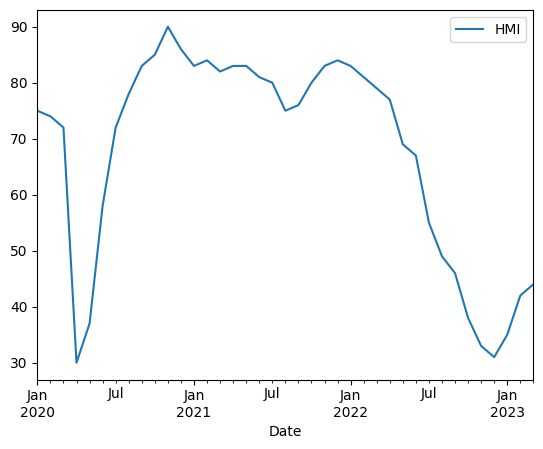

In [7]:
wrangled.query("Year >= 2020").plot(x='Date', y='HMI')

### Plot the mudafakah, bar-style

In [ ]:
wrangled.plot.bar(x='Date', y='HMI')

### Oof...that's fugly.  Do better.

Meh...not really in the mood to retype Matt's code for `matplotlib` stuff.  Neat exercise, but not a good use of my time right now.

I wonder if Chat-GPT 4 could do the heavy lifting for me if I provide it the dataframe and the png of the desired plot???

In [ ]:
def plot_hmi(df):
    for font in ['xtick.color', 'ytick.color', 'axes.labelcolor']:
        matplotlib.rcParams[font] = '#ffffff'
    matplotlib.rcParams['font.family'] = 'Roboto'

    fig = plt.Figure(figsize=(8, 6), dpi=200)
    fig.patch.set_facecolor('#1a1a1a')
    ax = fig.add_axes((.2, .4, .8, .4))
    # cmap = Linear

    return fig